# Demanda para Renta de Bicicletas en Seoul

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("SeoulBikeData.csv")
df

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0     01/12/2017                254     0            -5.2           37   
1     01/12/2017                204     1            -5.5           38   
2     01/12/2017                173     2            -6.0           39   
3     01/12/2017                107     3            -6.2           40   
4     01/12/2017                 78     4            -6.0           36   
...          ...                ...   ...             ...          ...   
8755  30/11/2018               1003    19             4.2           34   
8756  30/11/2018                764    20             3.4           37   
8757  30/11/2018                694    21             2.6           39   
8758  30/11/2018                712    22             2.1           41   
8759  30/11/2018                584    23             1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0                  2.2              2000                     -17.6   
1                  0.8              2000                     -17.6   
2                  1.0              2000                     -17.7   
3                  0.9              2000                     -17.6   
4                  2.3              2000                     -18.6   
...                ...               ...                       ...   
8755               2.6              1894                     -10.3   
8756               2.3              2000                      -9.9   
8757               0.3              1968                      -9.9   
8758               1.0              1859                      -9.8   
8759               1.3              1909                      -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

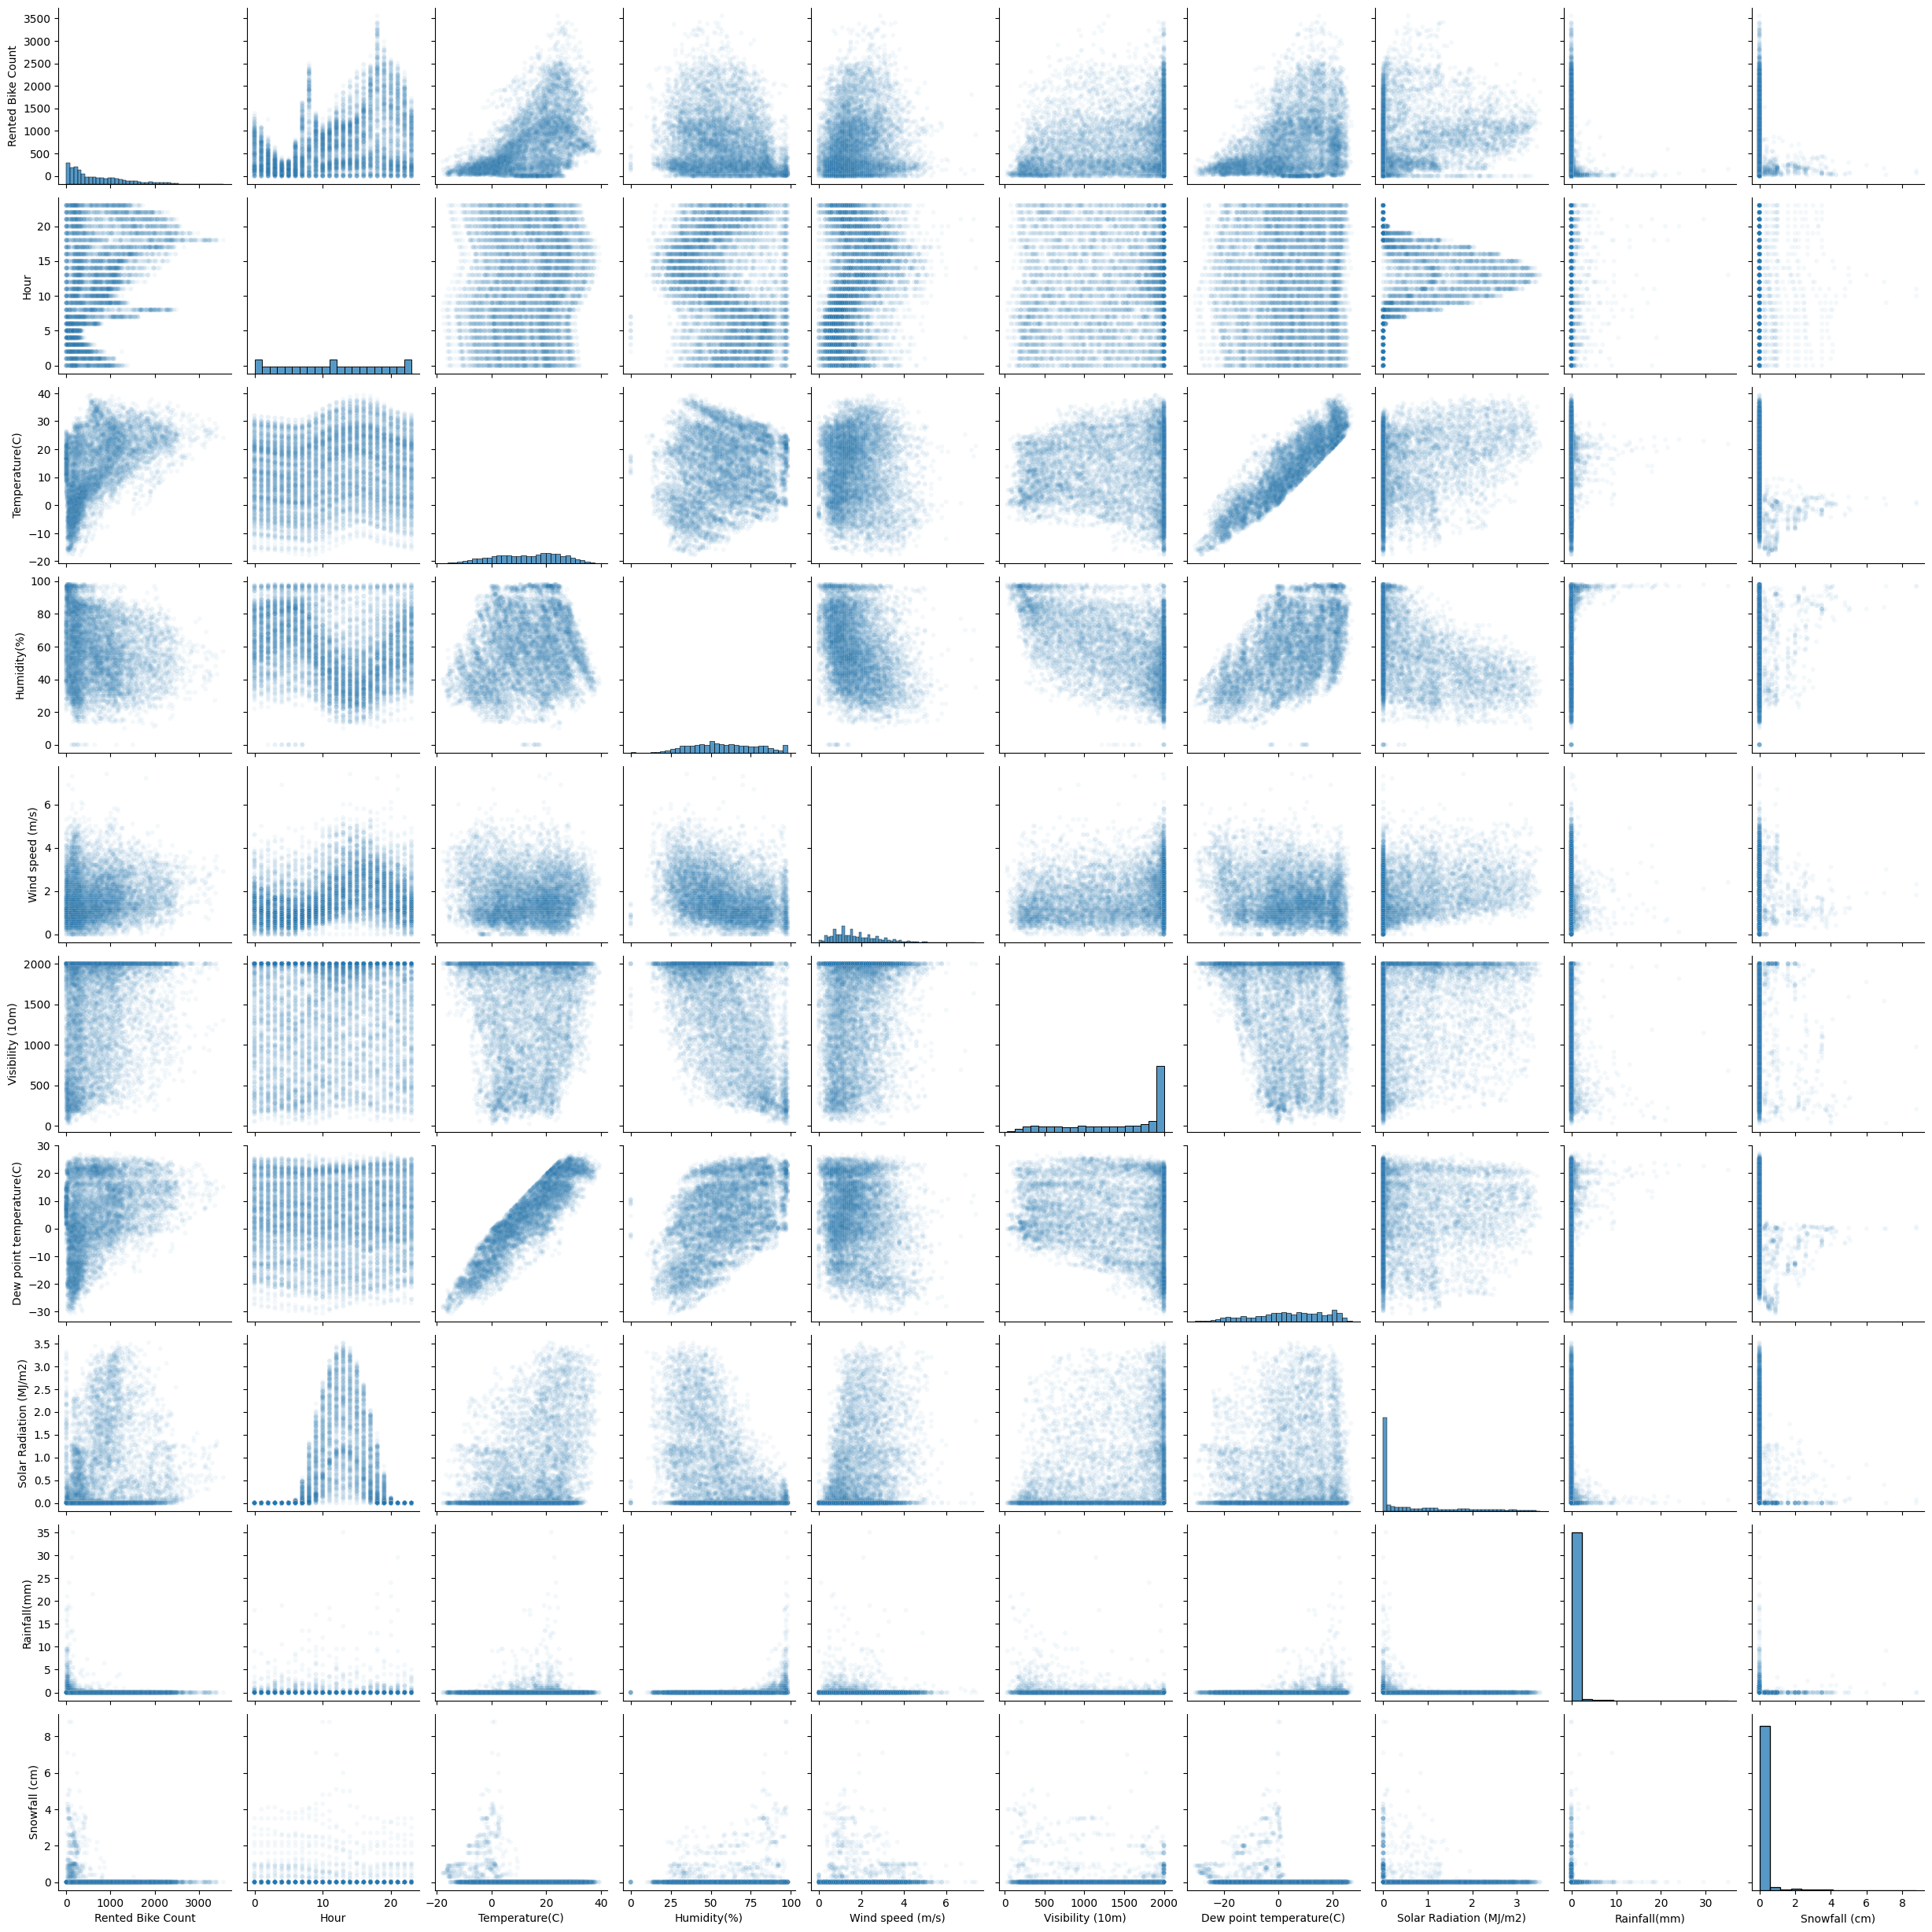

In [3]:
sns.pairplot(df, plot_kws = {'alpha': 0.05, "size": 0.5})

## Tema 1: Solución de euaciones no lineales

In [4]:
from scipy.optimize import curve_fit
from scipy.misc import derivative

### Encontrando la función

In [5]:
def f_fit(x, A, B, C, D):
    return A + (B * x) + (C * np.exp(D * x))

xdata = df["Temperature(C)"]
ydata = df["Rented Bike Count"]
params, cov = curve_fit(f_fit, xdata, ydata)
params

array([ 3.16766676e+02,  3.14134788e+01, -2.53626086e-03,  3.36049199e-01])

In [6]:
def f(x):
    return params[0] + (params[1] * x) + (params[2] * np.exp(params[3] * x))

In [7]:
xs = list(range(-20, 41))
ys = list(map(f, xs))

sns.scatterplot(x="Temperature(C)", y="Rented Bike Count", data=df, alpha=0.2, size=1)
plt.plot(xs, ys, c="red")

### Método de Biseccion

In [8]:
def Bisect(f, x1, xu, es, imax=1000):
    ea = 100
    i = 0
    xr = 0
    while ea >= es and i < imax:
        xrold = xr
        xr = (x1 + xu) / 2
        i += 1
        if xr != 0:
            ea = np.abs((xr - xrold) / xr) * 100
        test = f(x1) * f(xr)
        if test < 0:
            xu = xr
        elif test > 0:
            x1 = xr
        else:
            ea = 0
    return xr, i, ea


In [9]:
min_temp = Bisect(f, -15, -5, es=0.001)
max_temp = Bisect(f, 35, 41, es=0.001)
min_temp, max_temp

((-10.083847045898438, 17, 0.0007565956223377292),
 (39.6710205078125, 14, 0.0009231195285936273))

### Método de Newton-Raphson

In [10]:
def Nr(f, x0, es, imax=1000):
    i = 0
    ea = 100
    xr = x0
    while ea >= es and i < imax:
        xrold = xr
        xr = xrold - (f(xrold) / derivative(f, xrold))
        i += 1
        if xr != 0:
            ea = np.abs((xr -xrold) / xr) * 100
    return xr, i, ea

In [11]:
min_temp = Nr(f, 0, es=0.001)
max_temp = Nr(f, 35, es=0.001)
min_temp, max_temp

((-10.083779384220893, 3, 3.445686230803378e-11),
 (39.671001129693515, 9, 4.717407121610035e-05))

### Método Secante

In [12]:
def Secant(f, x0, x1, es, imax=1000):
    i = 0
    ea = 100
    xr = x1
    xrold = x0
    while ea >= es and i < imax:
        xrn = xr - (f(xr) * (xr - xrold)) / (f(xr) - f(xrold))
        i += 1
        if xrn != 0:
            ea = np.abs((xrn - xr) / xrn) * 100
        xrold = xr
        xr = xrn
    return xr, i, ea

In [21]:
min_temp = Secant(f, -15, -5, es=0.001)
max_temp = Secant(f, 35, 41, es=0.001)
min_temp, max_temp

((-10.083779384228334, 2, 4.8951102541782106e-05),
 (39.671000792640235, 6, 0.0001379099405289673))

## Tema 2: Regression Lineal

### Preprocesamiento de datos

In [14]:
df["Date"] = pd.to_datetime(df.Date)
df["Month"] = df.Date.dt.month
df["Year"] = df.Date.dt.year
df["Rainfall"] = (df["Rainfall(mm)"] > 0).astype("int")
df["Snowfall"] = (df["Snowfall (cm)"] > 0).astype("int")

In [15]:
X = df[["Hour", "Month", "Temperature(C)", "Year", "Rainfall", "Snowfall"]]
X["Hour2"] = X["Hour"] ** 2
X["Hour3"] = X["Hour"] ** 3
X["Hour4"] = X["Hour"] ** 4
X["Hour5"] = X["Hour"] ** 5
X["Hour6"] = X["Hour"] ** 6
X["Hour7"] = X["Hour"] ** 7
X["Hour8"] = X["Hour"] ** 8
X["Hour9"] = X["Hour"] ** 9
X["Month2"] = X["Month"] ** 2
X["Temp2"] = X["Temperature(C)"] ** 2
X["Temp3"] = X["Temperature(C)"] ** 3
y = df["Rented Bike Count"]

In [16]:
import statsmodels.api as sm 

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     760.9
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        04:32:02   Log-Likelihood:                -65279.
No. Observations:                8760   AIC:                         1.306e+05
Df Residuals:                    8743   BIC:                         1.307e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0126      0.001    -10.155      0.000      -0.015      -0.010
Hour              30.8739     69.955      0.441      0.659    -106.254     168.002
Month             23.9756      6.792      3.530      0.000      10.662      37.289
Temperature(C)    26.0228      0.908     28.647      0.000      24.242      27.803
Year               0.0355      0.014      2.624      0.009       0.009       0.062
Rainfall        -698.3826     19.006    -36.745      0.000    -735.639    -661.126
Snowfall         -34.9564     22.582     -1.548      0.122     -79.222       9.310
Hour2           -113.0639     67.070     -1.686      0.092    -244.538      18.410
Hour3             11.6420     26.951      0.432      0.666     -41.188      64.472
Hour4              7.6677      5.654      1.356      0.175      -3.415      18.750
Hour5             -2.0533      0.683     -3.007      0.003      -3.392      -0.715
Hour6              0.2139      0.049      4.349      0.000       0.117       0.310
Hour7             -0.0112      0.002     -5.370      0.000      -0.015      -0.007
Hour8              0.0003   4.81e-05      6.113      0.000       0.000       0.000
Hour9          -3.078e-06   4.64e-07     -6.635      0.000   -3.99e-06   -2.17e-06
Month2            -1.1597      0.509     -2.277      0.023      -2.158      -0.161
Temp2              1.5449      0.078     19.855      0.000       1.392       1.697
Temp3             -0.0500      0.002    -23.668      0.000      -0.054      -0.046
==============================================================================
Omnibus:                      420.114   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1310.019
Skew:                           0.174   Prob(JB):                    3.41e-285
Kurtosis:                       4.862   Cond. No.                     4.24e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
y.std()

644.9974677392156

In [18]:
from statsmodels.tools.eval_measures import rmse

y_pred = model.predict(X)
rmse(y, y_pred)

416.9733317534691

In [19]:
sns.lineplot(x=X.Hour, y=y)
sns.lineplot(x=X.Hour, y=y_pred)

<AxesSubplot: xlabel='Hour', ylabel='Rented Bike Count'>

In [20]:
sns.lineplot(x=X.Month, y=y)
sns.lineplot(x=X.Month, y=y_pred)

<AxesSubplot: xlabel='Month', ylabel='Rented Bike Count'>

[Source](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) of dataset. 

**Citations**:
- Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
- Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020 